<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202410_AML/blob/main/Laboratorios/Laboratorio%201/Sesión%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

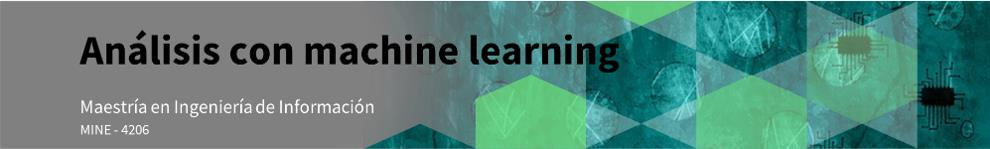

**Tutores**.
* Nicolás Tibatá Casteñeda.
* Fabián Camilo Castellanos P.

#Tabla de contenido

[Contexto y objetivos.](#scrollTo=BhMNxdBNtgMc)<br>
[Entendimiento del negocio.](#scrollTo=kW5gUhNTvOyo)<br>
[0. Instalación de librerías.](#scrollTo=ubQTZytzvVZD)<br>
[1. Importar librerías](#scrollTo=f8uTdaJbvq2h)<br>
[2. Introducción a los datos.](#scrollTo=wdUG_NLywKek)<br>
[3. Modelamiento.](#scrollTo=qSE9AWN77TlO)<br>
&nbsp;&nbsp;[3.1. Regresión lineal.](#scrollTo=h9-gk-QzAgye)<br>
&nbsp;&nbsp;[3.2. Regresión lineal con norma L1: Lasso.](#scrollTo=TEa_VzzoFrx3)<br>
&nbsp;&nbsp;[3.3. Regresión polinomial con norma L1.](#scrollTo=vZRLUFs4cMy3)<br>
[4. Mejor modelo polinomial con L1.](#scrollTo=Je7QvVi0GVCH)<br>
[5. Preguntas.](#scrollTo=5kCQH7p0ADGR)<br>

---
# Contexto y objetivos.

Las emisiones de CO2 tienen importantes impactos ambientales. La acumulación de CO2 en la atmósfera contribuye al efecto invernadero, atrapando calor y provocando el calentamiento global. Esto conduce a diversos efectos adversos, incluido el aumento de las temperaturas globales, el aumento del nivel del mar, cambios en los patrones climáticos y alteraciones de los ecosistemas. Las consecuencias a largo plazo del cambio climático pueden afectar negativamente la salud humana, la agricultura, la biodiversidad y los sistemas socioeconómicos.

Por tanto, reducir las emisiones de CO2 es crucial para mitigar el cambio climático y minimizar sus efectos nocivos sobre el medio ambiente y el bienestar humano. Esto implica hacer la transición a fuentes de energía más limpias y renovables, mejorar la eficiencia energética, adoptar prácticas sostenibles y promover esfuerzos de conservación.
El set de datos reúne información de emisiones de automotores e información de consumo de combustible.

**Objetivos**:
* Resolver un problema de Aprendizaje de Datos.
* Revisar los conceptos básicos de una Regresión Lineal.
* Familiarizarse con la herramienta de Jupyter Notebook.

**Datos**: Información obtenida de [CO2 Emissions](https://www.kaggle.com/datasets/bhuviranga/co2-emissions).

En otras palabras, continuamos con los mismos datos de la sesión número 1.

# Entendimiento del negocio.

Con apoyo del negocio ha sido posible elaborar el siguiente diccionario de datos:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **Make** | Nombre del fabricante de automotores. |
| **Model** | Modelo del automotor. |
| **Vehicle Class** | Clase de vehículo. |
| **Engine Size (L)** | Tamaño del motor. Las unidades están expresadas en litros. |
| **Transmission** | Tipo de transmisión del vehículo, automática o manual. |
| **Fuel Type** | Tipo de combustible: *Regular Gasoline* (X), *Premium Gasoline* (Z), *Ethanol* (E), *Diesel* (D), *Natural Gas* (N). |
| **Fuel Consumption City (L/100km)** | Consumo del vehículo en ciudad. Las unidades están expresadas en litros por kilómetro. |
| **Fuel Consumption Hwy (L/100 km)** | Consumo del vehículo en carretera. Las unidades están expresadas en litros por kilómetro. |
| **Fuel Consumption Comb (L/100 km)** | Consumo del vehículo en ciudad y en carretera. Las unidades están expresadas en litros por kilómetro.|
| **Fuel Consumption Comb (mpg)** | Consumo del vehículo en ciudad y en carretera. Las unidades están expresadas en millas por galón. |
| **CO2 Emissions(g/km)** | Cantidad de gramos emitidos de C02 por kilometro. |

---
# 0. Instalación de librerías.

In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=09361a0334b633d0a65a491f53415866d0d4c83b8bc09276d538d8db8c1bcb5e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's depende

In [2]:
!pip install plotly

---
# 1. Importar librerías

In [3]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector

#Persistencia de modelos
from joblib import dump, load

#Librerías extras
import itertools

---
# 2. Introducción a los datos.

In [4]:
url = 'https://raw.githubusercontent.com/fcastellanosp/MINE-4206_202410_AML/main/Laboratorios/Laboratorio%201/CO2_Emissions.csv'

data = pd.read_csv(url)

Para estar seguros de la carga de la información, visualizaremos las primeras 20 filas:

In [5]:
data.head(20)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


Separamos los datos de entrenamiento y test (20%), junto con el parámetro de reproducibilidad o semilla (`random_state`):

In [6]:
train, test = train_test_split(data, test_size=0.2, random_state=19)
train.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3146,PORSCHE,CAYMAN GT4,TWO-SEATER,3.8,6,M6,Z,13.3,10.1,11.8,24,277
4639,CHRYSLER,300 AWD FFV,FULL-SIZE,3.6,6,A8,X,12.8,8.7,11.0,26,258
5457,ACURA,MDX Hybrid AWD,SUV - SMALL,3.0,6,AM7,Z,9.1,9.0,9.0,31,210
1003,TOYOTA,TACOMA,PICKUP TRUCK - SMALL,4.0,6,M6,X,14.5,11.3,13.1,22,301
5583,BUICK,Envision AWD,SUV - SMALL,2.5,4,A6,X,11.1,8.6,10.0,28,234


## 2.2. Exploración de los datos.

La exploración de los datos la realizamos en la sesión número 1, sin embargo, ¿Qué otros análisis adicionarías sobre la información?.

In [7]:
ProfileReport(train)

Output hidden; open in https://colab.research.google.com to view.

## 2.2. Preparación de los datos.

### 2.2.1. Datos de entrenamiento:

Tratamiento de los valores duplicados.

In [8]:
# Eliminación de filas duplicadas
train = train.drop_duplicates()

Eliminamos las variables que no tendremos en cuenta en el modelamiento

In [9]:
drop_fields = ['Model', 'Vehicle Class', 'Transmission']

In [10]:
train = train.drop(drop_fields, axis = 1)
train

,Make,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3146,PORSCHE,3.8,6,Z,13.3,10.1,11.8,24,277
4639,CHRYSLER,3.6,6,X,12.8,8.7,11.0,26,258
5457,ACURA,3.0,6,Z,9.1,9.0,9.0,31,210
1003,TOYOTA,4.0,6,X,14.5,11.3,13.1,22,301
5583,BUICK,2.5,4,X,11.1,8.6,10.0,28,234
...,...,...,...,...,...,...,...,...,...
1043,VOLKSWAGEN,2.0,4,D,8.1,6.4,7.4,38,198
5032,LAMBORGHINI,5.2,10,Z,17.2,12.3,15.0,19,350
1378,CHRYSLER,3.6,6,X,12.8,8.1,10.7,26,246
757,MERCEDES-BENZ,5.5,8,Z,15.5,11.0,13.5,21,310


Generamos una copia de la información para entrenamiento:

In [11]:
new_train = train.copy()

In [12]:
new_train.head()

,Make,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3146,PORSCHE,3.8,6,Z,13.3,10.1,11.8,24,277
4639,CHRYSLER,3.6,6,X,12.8,8.7,11.0,26,258
5457,ACURA,3.0,6,Z,9.1,9.0,9.0,31,210
1003,TOYOTA,4.0,6,X,14.5,11.3,13.1,22,301
5583,BUICK,2.5,4,X,11.1,8.6,10.0,28,234


Según lo propuesto por el negocio, nuestro objetivo será predecir las emisiones (Y) basado en sus características (X). Ya que entendimos que significa cada uno de nuestros atributos, realizaremos la separación de los datos

In [13]:
target_feature = 'CO2 Emissions(g/km)'

In [14]:
X_train, Y_train = new_train.drop([target_feature], axis=1), new_train[target_feature]
display(X_train)

,Make,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
3146,PORSCHE,3.8,6,Z,13.3,10.1,11.8,24
4639,CHRYSLER,3.6,6,X,12.8,8.7,11.0,26
5457,ACURA,3.0,6,Z,9.1,9.0,9.0,31
1003,TOYOTA,4.0,6,X,14.5,11.3,13.1,22
5583,BUICK,2.5,4,X,11.1,8.6,10.0,28
...,...,...,...,...,...,...,...,...
1043,VOLKSWAGEN,2.0,4,D,8.1,6.4,7.4,38
5032,LAMBORGHINI,5.2,10,Z,17.2,12.3,15.0,19
1378,CHRYSLER,3.6,6,X,12.8,8.1,10.7,26
757,MERCEDES-BENZ,5.5,8,Z,15.5,11.0,13.5,21


In [15]:
display(Y_train)

3146    277
4639    258
5457    210
1003    301
5583    234
       ... 
1043    198
5032    350
1378    246
757     310
5725    274
Name: CO2 Emissions(g/km), Length: 5189, dtype: int64

Definimos las variables de acuerdo con su tipo de dato: categórica o numérica.

In [16]:
cat_features = ['Make', 'Transmission', 'Fuel Type']
cat_features

['Make', 'Transmission', 'Fuel Type']

In [17]:
num_features = list(set(X_train.columns) - set(cat_features))
num_features

['Fuel Consumption City (L/100 km)',
 'Engine Size(L)',
 'Fuel Consumption Hwy (L/100 km)',
 'Cylinders',
 'Fuel Consumption Comb (mpg)',
 'Fuel Consumption Comb (L/100 km)']

### 2.2.2. Datos de prueba.

Tratamiento de los valores duplicados.

In [18]:
new_test = test.copy()
new_test = new_test.drop(drop_fields, axis=1)
new_test = new_test.drop_duplicates()
new_test

,Make,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1481,FORD,1.6,4,X,8.9,6.8,8.0,35,184
4695,FORD,3.5,6,X,13.5,9.1,11.5,25,270
5399,TOYOTA,5.7,8,X,18.4,13.8,16.4,17,384
4504,BMW,4.4,8,Z,15.4,11.2,13.5,21,317
933,ROLLS-ROYCE,6.6,12,Z,18.7,11.8,15.6,18,359
...,...,...,...,...,...,...,...,...,...
5545,BMW,3.0,6,Z,11.3,8.0,9.8,29,229
4689,FIAT,2.4,4,X,11.0,8.0,9.7,29,226
4326,VOLKSWAGEN,1.8,4,X,9.7,7.2,8.5,33,199
5160,MERCEDES-BENZ,3.0,6,Z,12.4,9.5,11.1,25,261


In [19]:
X_test, Y_test = new_test.drop([target_feature],axis=1), new_test[target_feature]
display(X_test)
Y_test

,Make,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
1481,FORD,1.6,4,X,8.9,6.8,8.0,35
4695,FORD,3.5,6,X,13.5,9.1,11.5,25
5399,TOYOTA,5.7,8,X,18.4,13.8,16.4,17
4504,BMW,4.4,8,Z,15.4,11.2,13.5,21
933,ROLLS-ROYCE,6.6,12,Z,18.7,11.8,15.6,18
...,...,...,...,...,...,...,...,...
5545,BMW,3.0,6,Z,11.3,8.0,9.8,29
4689,FIAT,2.4,4,X,11.0,8.0,9.7,29
4326,VOLKSWAGEN,1.8,4,X,9.7,7.2,8.5,33
5160,MERCEDES-BENZ,3.0,6,Z,12.4,9.5,11.1,25


1481    184
4695    270
5399    384
4504    317
933     359
       ... 
5545    229
4689    226
4326    199
5160    261
2770    252
Name: CO2 Emissions(g/km), Length: 1346, dtype: int64

### 2.2.3. Funciones complementarias.

Definimos una función para actualizar los valores para la transmisión y el tipo de combustible:

In [20]:
def fix_cat_values(df):
  for column in df.columns:
    if column == 'Fuel Type':
      fuel_labels = {'X': 'Regular Gasoline', 'Z': 'Premium Gasoline', 'E': 'Ethanol', 'D': 'Diesel', 'N': 'Natural Gas'}
      df['Fuel Type'] = df['Fuel Type'].replace(fuel_labels)
    elif column == 'Transmission':
      df['Transmission'] = df['Transmission'].apply(lambda x: 'Automatic' if x.startswith('A') else 'Manual')
  return df

---
# 3. Modelamiento.

Seguiremos haciendo uso de la librería `scikit-learn` para entrenar nuestros modelos.

## 3.1. Regresión lineal

### 3.1.1. Preparación de los datos

Definimos el transformador numérico, el cuál incluye la imputación de valores ausentes mediante el promedio:

In [21]:
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean'))
    ]
)

Definimos el transformador categórico, el cuál incluye el uso de FunctionTransformer para ajustar los datos de acuerdo con el diccionario de datos y generar el OneHotEncoder para que el algoritmo pueda entender la información como datos numéricos:

In [22]:
cat_transformer = Pipeline(
    steps=[
        ('imputer', FunctionTransformer(fix_cat_values, validate=False)),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

Una vez que hemos definido los transformadores, definimos los pasos (`steps`), que permitirán construir y ejecutar el Pipeline. Los pasos son los siguientes:

1.   `num`, incluye el transformador numérico y la la relación de las columnas numéricas haciendo uso de `make_column_selector`.
2.   `cat`, incluye el transformador categórico y la la relación de dichas columnas haciendo uso de `make_column_selector`.

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_include=np.number)),
        ("cat", cat_transformer, make_column_selector(dtype_include=object))
    ]
)

Ensamblamos nuestro Pipeline con los pasos ya descritos y los cuáles denominaremos como `column_transformer`. Así mismo, veremos gráficamente los pasos construidos del Pipeline:

In [24]:
pipe = Pipeline(steps=[
    ('column_transformer', preprocessor)
])

pipe

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ae880623250>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fix_cat_values at 0x7ae821e45ab0>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ae880620ca0>)]))])

El primer vistazo del Pipeline entrenado:

In [25]:
pipe.fit_transform(X_train)

<5189x53 sparse matrix of type '<class 'numpy.float64'>'
	with 41512 stored elements in Compressed Sparse Row format>

Verificamos las columnas con el fin de conocer si el Pipeline quedó correctamente ensamblado:

In [26]:
cat_column_names = pipe['column_transformer'].transformers_[1][1][1].get_feature_names_out()
num_column_names = pipe['column_transformer'].transformers_[0][1].feature_names_in_
col_names = list(num_column_names) + list(cat_column_names)

col_names

['Engine Size(L)',
 'Cylinders',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 'Make_ACURA',
 'Make_ALFA ROMEO',
 'Make_ASTON MARTIN',
 'Make_AUDI',
 'Make_BENTLEY',
 'Make_BMW',
 'Make_BUGATTI',
 'Make_BUICK',
 'Make_CADILLAC',
 'Make_CHEVROLET',
 'Make_CHRYSLER',
 'Make_DODGE',
 'Make_FIAT',
 'Make_FORD',
 'Make_GENESIS',
 'Make_GMC',
 'Make_HONDA',
 'Make_HYUNDAI',
 'Make_INFINITI',
 'Make_JAGUAR',
 'Make_JEEP',
 'Make_KIA',
 'Make_LAMBORGHINI',
 'Make_LAND ROVER',
 'Make_LEXUS',
 'Make_LINCOLN',
 'Make_MASERATI',
 'Make_MAZDA',
 'Make_MERCEDES-BENZ',
 'Make_MINI',
 'Make_MITSUBISHI',
 'Make_NISSAN',
 'Make_PORSCHE',
 'Make_RAM',
 'Make_ROLLS-ROYCE',
 'Make_SCION',
 'Make_SMART',
 'Make_SRT',
 'Make_SUBARU',
 'Make_TOYOTA',
 'Make_VOLKSWAGEN',
 'Make_VOLVO',
 'Fuel Type_Diesel',
 'Fuel Type_Ethanol',
 'Fuel Type_Natural Gas',
 'Fuel Type_Premium Gasoline',
 'Fuel Type_Regular Gasoline']

Ahora veamos el dataset de entrenamiento después del pipeline:

In [27]:
pd.DataFrame(pipe.fit_transform(X_train).toarray(), columns=col_names)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Make_SRT,Make_SUBARU,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Fuel Type_Diesel,Fuel Type_Ethanol,Fuel Type_Natural Gas,Fuel Type_Premium Gasoline,Fuel Type_Regular Gasoline
0,3.8,6.0,13.3,10.1,11.8,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.6,6.0,12.8,8.7,11.0,26.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.0,6.0,9.1,9.0,9.0,31.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,6.0,14.5,11.3,13.1,22.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.5,4.0,11.1,8.6,10.0,28.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,2.0,4.0,8.1,6.4,7.4,38.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5185,5.2,10.0,17.2,12.3,15.0,19.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5186,3.6,6.0,12.8,8.1,10.7,26.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5187,5.5,8.0,15.5,11.0,13.5,21.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 3.1.2. Implementación

Una vista funcional del pipeline para preparar los datos y modelar una regresión lineal, es la siguiente:

In [28]:
estimators_lr = [
        ('transform',preprocessor),
        ('regression', LinearRegression())
]

pipe_lr = Pipeline(estimators_lr)

pipe_lr.fit(X_train, Y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ae880623250>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fix_cat_values at 0x7ae821e45ab0>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ae880620ca0>)])),
                ('regression', LinearRegression())])

Visualizamos los coeficientes del proceso:

In [29]:
print('Coefficients: ', pipe_lr["regression"].coef_)
print('Intercept: ', pipe_lr["regression"].intercept_)

Coefficients:  [ 7.00177286e-01  7.93643540e-01  5.92157895e+00  5.48943162e+00
  8.15173600e+00 -9.71827606e-01 -4.18164930e+00 -7.34082183e-01
  6.72722384e-01 -2.19020763e+00  4.32253437e+00 -2.70156489e+00
  2.21192306e+01 -8.82335908e-01 -1.85294342e+00 -4.92596311e-01
  2.80519057e+00  9.32747092e-01 -1.65678365e+00  1.45186497e+00
  2.29845274e+00 -7.71440525e-01 -9.94947504e-01  1.67797211e-01
 -2.71359575e+00 -1.56651561e+00  3.23045837e-01 -8.17650725e-03
  6.77098238e+00 -1.91178433e+00 -2.96890122e+00  5.89054808e-01
  2.88955158e+00 -1.91200166e+00 -1.68487166e+00 -2.89462560e+00
 -2.35341694e+00 -6.92858364e-01 -2.82586173e+00  1.02826541e+00
  4.21396571e+00 -3.51169810e+00 -2.47765609e+00  6.44425884e-01
 -2.36546458e+00 -1.04889114e-01 -2.23108525e+00 -2.54787767e+00
  6.19777963e+01 -7.60344792e+01 -4.92288699e+01  3.22511815e+01
  3.10343713e+01]
Intercept:  31.108914530822005


In [30]:
coef_lr = dict(zip(col_names, pipe_lr["regression"].coef_))
for k,v in coef_lr.items():
    print(f'{k} = {v:,.2f}')

Engine Size(L) = 0.70
Cylinders = 0.79
Fuel Consumption City (L/100 km) = 5.92
Fuel Consumption Hwy (L/100 km) = 5.49
Fuel Consumption Comb (L/100 km) = 8.15
Fuel Consumption Comb (mpg) = -0.97
Make_ACURA = -4.18
Make_ALFA ROMEO = -0.73
Make_ASTON MARTIN = 0.67
Make_AUDI = -2.19
Make_BENTLEY = 4.32
Make_BMW = -2.70
Make_BUGATTI = 22.12
Make_BUICK = -0.88
Make_CADILLAC = -1.85
Make_CHEVROLET = -0.49
Make_CHRYSLER = 2.81
Make_DODGE = 0.93
Make_FIAT = -1.66
Make_FORD = 1.45
Make_GENESIS = 2.30
Make_GMC = -0.77
Make_HONDA = -0.99
Make_HYUNDAI = 0.17
Make_INFINITI = -2.71
Make_JAGUAR = -1.57
Make_JEEP = 0.32
Make_KIA = -0.01
Make_LAMBORGHINI = 6.77
Make_LAND ROVER = -1.91
Make_LEXUS = -2.97
Make_LINCOLN = 0.59
Make_MASERATI = 2.89
Make_MAZDA = -1.91
Make_MERCEDES-BENZ = -1.68
Make_MINI = -2.89
Make_MITSUBISHI = -2.35
Make_NISSAN = -0.69
Make_PORSCHE = -2.83
Make_RAM = 1.03
Make_ROLLS-ROYCE = 4.21
Make_SCION = -3.51
Make_SMART = -2.48
Make_SRT = 0.64
Make_SUBARU = -2.37
Make_TOYOTA = -0.10
M

### 3.1.3. Evaluación

In [31]:
y_pred_train_lr = pipe_lr.predict(X_train)
y_pred_train_lr

array([275.02365092, 260.18681981, 212.57106109, ..., 254.44764004,
       313.68362563, 270.79067601])

Las métricas de la regresión lineal que acabamos de generar, son las siguientes:

In [32]:
n,p = X_train.shape

print('------------ Regresión Lineal ------------')
print("Sum of squares (MSE): %.2f" % mean_squared_error(Y_train, y_pred_train_lr))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(Y_train, y_pred_train_lr) ** (1/2))
print("R2-score: %.5f" % r2_score(Y_train, y_pred_train_lr) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(Y_train, y_pred_train_lr))*(n-1)/(n-p-1)) )

------------ Regresión Lineal ------------
Sum of squares (MSE): 24.36
Root of sum of squares (RMSE): 4.94
R2-score: 0.99315
Adj R2-score: 0.99314


Demos un vistazo gráfico a nuestro primer modelo con Pipeline:

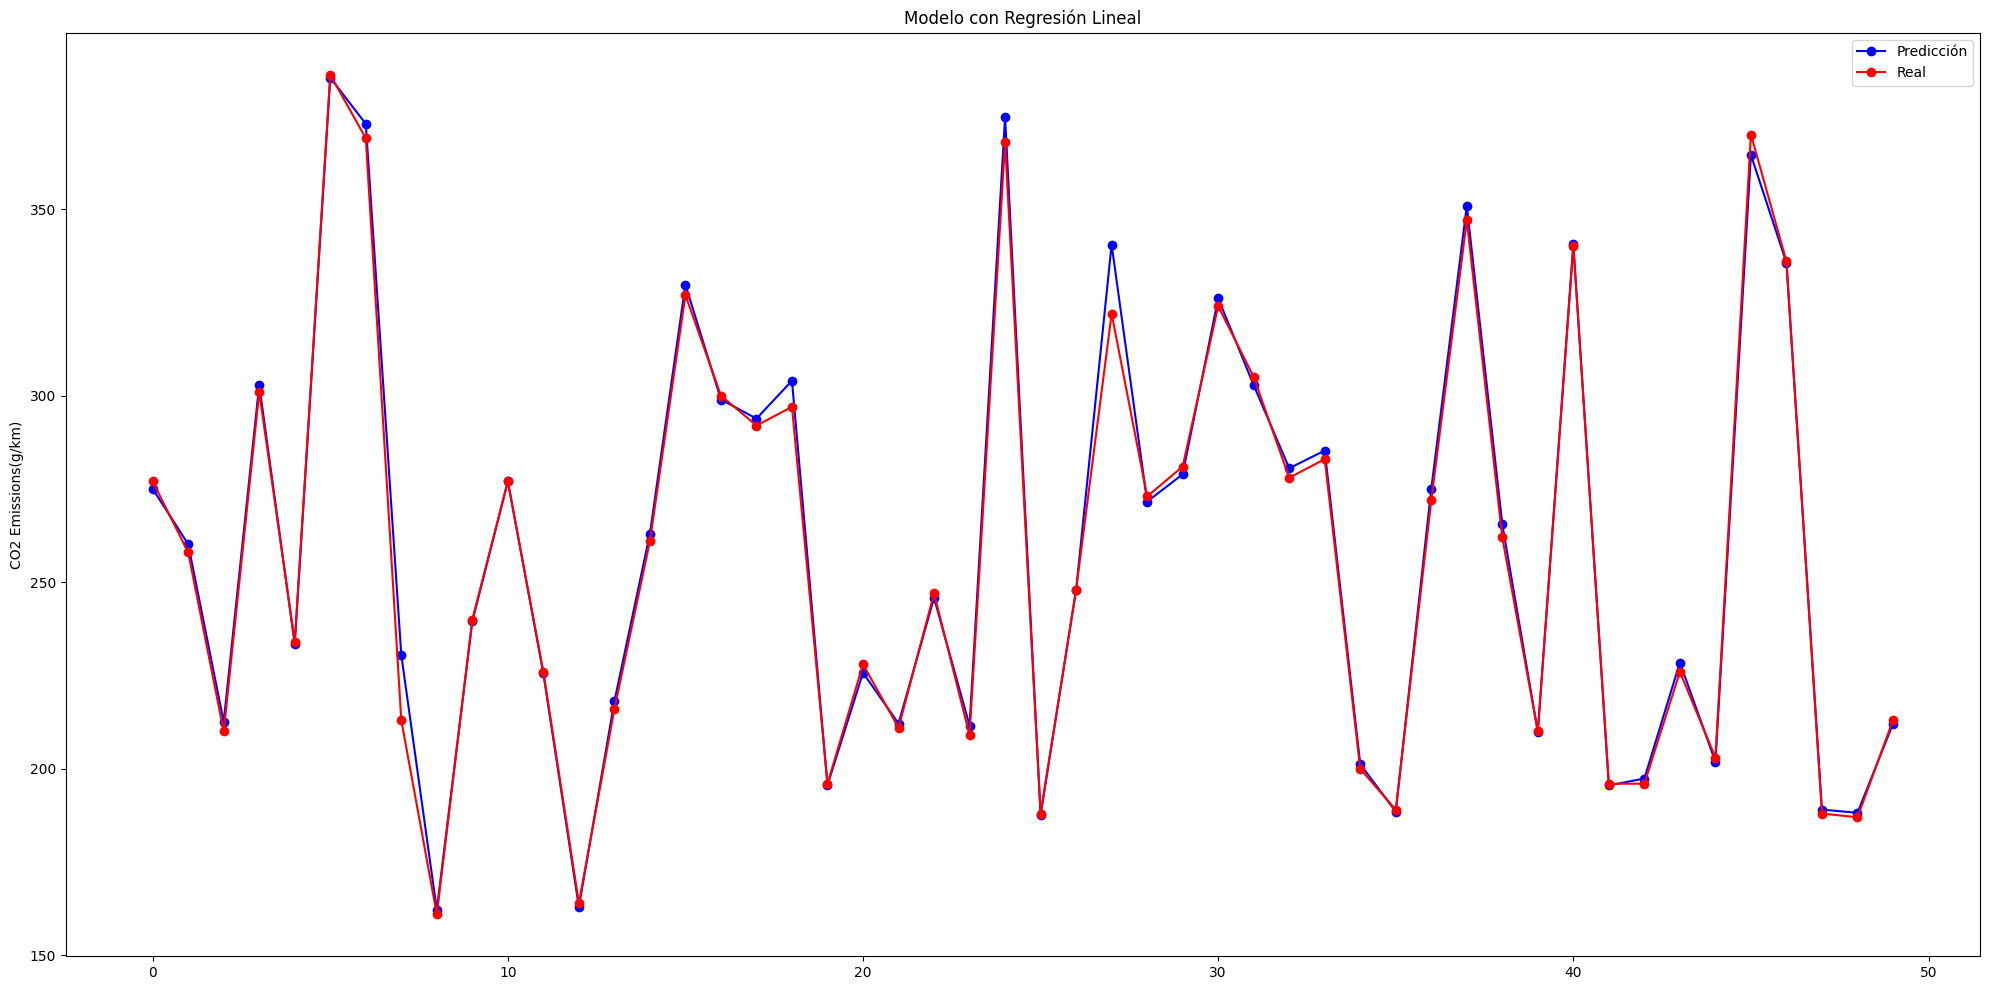

In [33]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(Y_train[:50])))
axs.plot(xvals, y_pred_train_lr[:50],'bo-', label='Predicción')
axs.plot(xvals, Y_train[:50],'ro-', label='Real')

axs.set(title='Modelo con Regresión Lineal', ylabel=Y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

Hasta este punto, construimos nuestro primer modelo de regresión lineal usando un Pipeline para preparar datos y sin estandarizar datos.

## 3.2. Regresión lineal con penalización norma L1: **Lasso**.

### 3.2.1. Preparación de los datos

Preparamos el Pipeline correspondiente, incluyendo estandarización para los datos numéricos:

In [34]:
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ("scaler_std", StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('imputer', FunctionTransformer(fix_cat_values, validate=False)),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_include=np.number)),
        ("cat", cat_transformer, make_column_selector(dtype_include=object))
    ]
)

### 3.2.2. Implementación

`Lasso` permite controlar la regularización con su parámetro `alpha` el cuál puede ser definido en el constructor, en caso que no se especifique asumirá un valor $alpha = 1$.

In [35]:
estimators_lr_l1 = [
        ('transform', preprocessor),
        ('regression', Lasso())
]

pipe_lr_l1 = Pipeline(estimators_lr_l1)

pipe_lr_l1.fit(X_train, Y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler_std',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ae822a4e650>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fix_cat_values at 0x7ae821e45ab0>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ae821c71330>)])),
                ('regression', Lasso())])

Para entender mejor los parámetros obtenidos, vamos a asociarlos a cada atributo.

In [36]:
print('Coefficients: ', pipe_lr_l1["regression"].coef_)
print('Intercept: ', pipe_lr_l1["regression"].intercept_)

Coefficients:  [  3.02834682   6.04048949  15.39931103  10.69707499  15.90567894
 -12.56998747  -0.           0.           0.           0.
   0.          -0.           0.          -0.           0.
  -0.          -0.          -0.          -0.           0.
   0.           0.          -0.          -0.          -0.
   0.           0.           0.           0.           0.
  -0.           0.           0.          -0.           0.
  -0.          -0.          -0.          -0.           0.
   0.          -0.          -0.           0.          -0.
  -0.           0.          -0.           0.         -66.07311261
  -0.           0.           0.        ]
Intercept:  254.3275097234801


In [37]:
coef_lr_l1 = dict(zip(col_names, pipe_lr_l1["regression"].coef_))
for k,v in coef_lr_l1.items():
    print(f'{k} = {v:,.2f}')

Engine Size(L) = 3.03
Cylinders = 6.04
Fuel Consumption City (L/100 km) = 15.40
Fuel Consumption Hwy (L/100 km) = 10.70
Fuel Consumption Comb (L/100 km) = 15.91
Fuel Consumption Comb (mpg) = -12.57
Make_ACURA = -0.00
Make_ALFA ROMEO = 0.00
Make_ASTON MARTIN = 0.00
Make_AUDI = 0.00
Make_BENTLEY = 0.00
Make_BMW = -0.00
Make_BUGATTI = 0.00
Make_BUICK = -0.00
Make_CADILLAC = 0.00
Make_CHEVROLET = -0.00
Make_CHRYSLER = -0.00
Make_DODGE = -0.00
Make_FIAT = -0.00
Make_FORD = 0.00
Make_GENESIS = 0.00
Make_GMC = 0.00
Make_HONDA = -0.00
Make_HYUNDAI = -0.00
Make_INFINITI = -0.00
Make_JAGUAR = 0.00
Make_JEEP = 0.00
Make_KIA = 0.00
Make_LAMBORGHINI = 0.00
Make_LAND ROVER = 0.00
Make_LEXUS = -0.00
Make_LINCOLN = 0.00
Make_MASERATI = 0.00
Make_MAZDA = -0.00
Make_MERCEDES-BENZ = 0.00
Make_MINI = -0.00
Make_MITSUBISHI = -0.00
Make_NISSAN = -0.00
Make_PORSCHE = -0.00
Make_RAM = 0.00
Make_ROLLS-ROYCE = 0.00
Make_SCION = -0.00
Make_SMART = -0.00
Make_SRT = 0.00
Make_SUBARU = -0.00
Make_TOYOTA = -0.00
Mak

### 3.2.3. Evaluación

In [38]:
y_pred_train_lr_l1 = pipe_lr_l1.predict(X_train)
y_pred_train_lr_l1

array([275.29808878, 258.34432846, 222.99671994, ..., 253.90507538,
       313.72407733, 288.74120723])

Para determinar nuestro rendimiento, vamos a utilizar dos métricas, el $MSE$ y el $R^2$.

In [39]:
n,p = X_train.shape

print('------------ Regresión Lasso con entrenamiento------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(Y_train, y_pred_train_lr_l1))
print("R2-score: %.5f" % r2_score(Y_train, y_pred_train_lr_l1) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(Y_train, y_pred_train_lr_l1))*(n-1)/(n-p-1)) )

------------ Regresión Lasso con entrenamiento------------
Residual sum of squares (MSE): 92.66
R2-score: 0.97394
Adj R2-score: 0.97390


La visualización gráfica de la regresión:

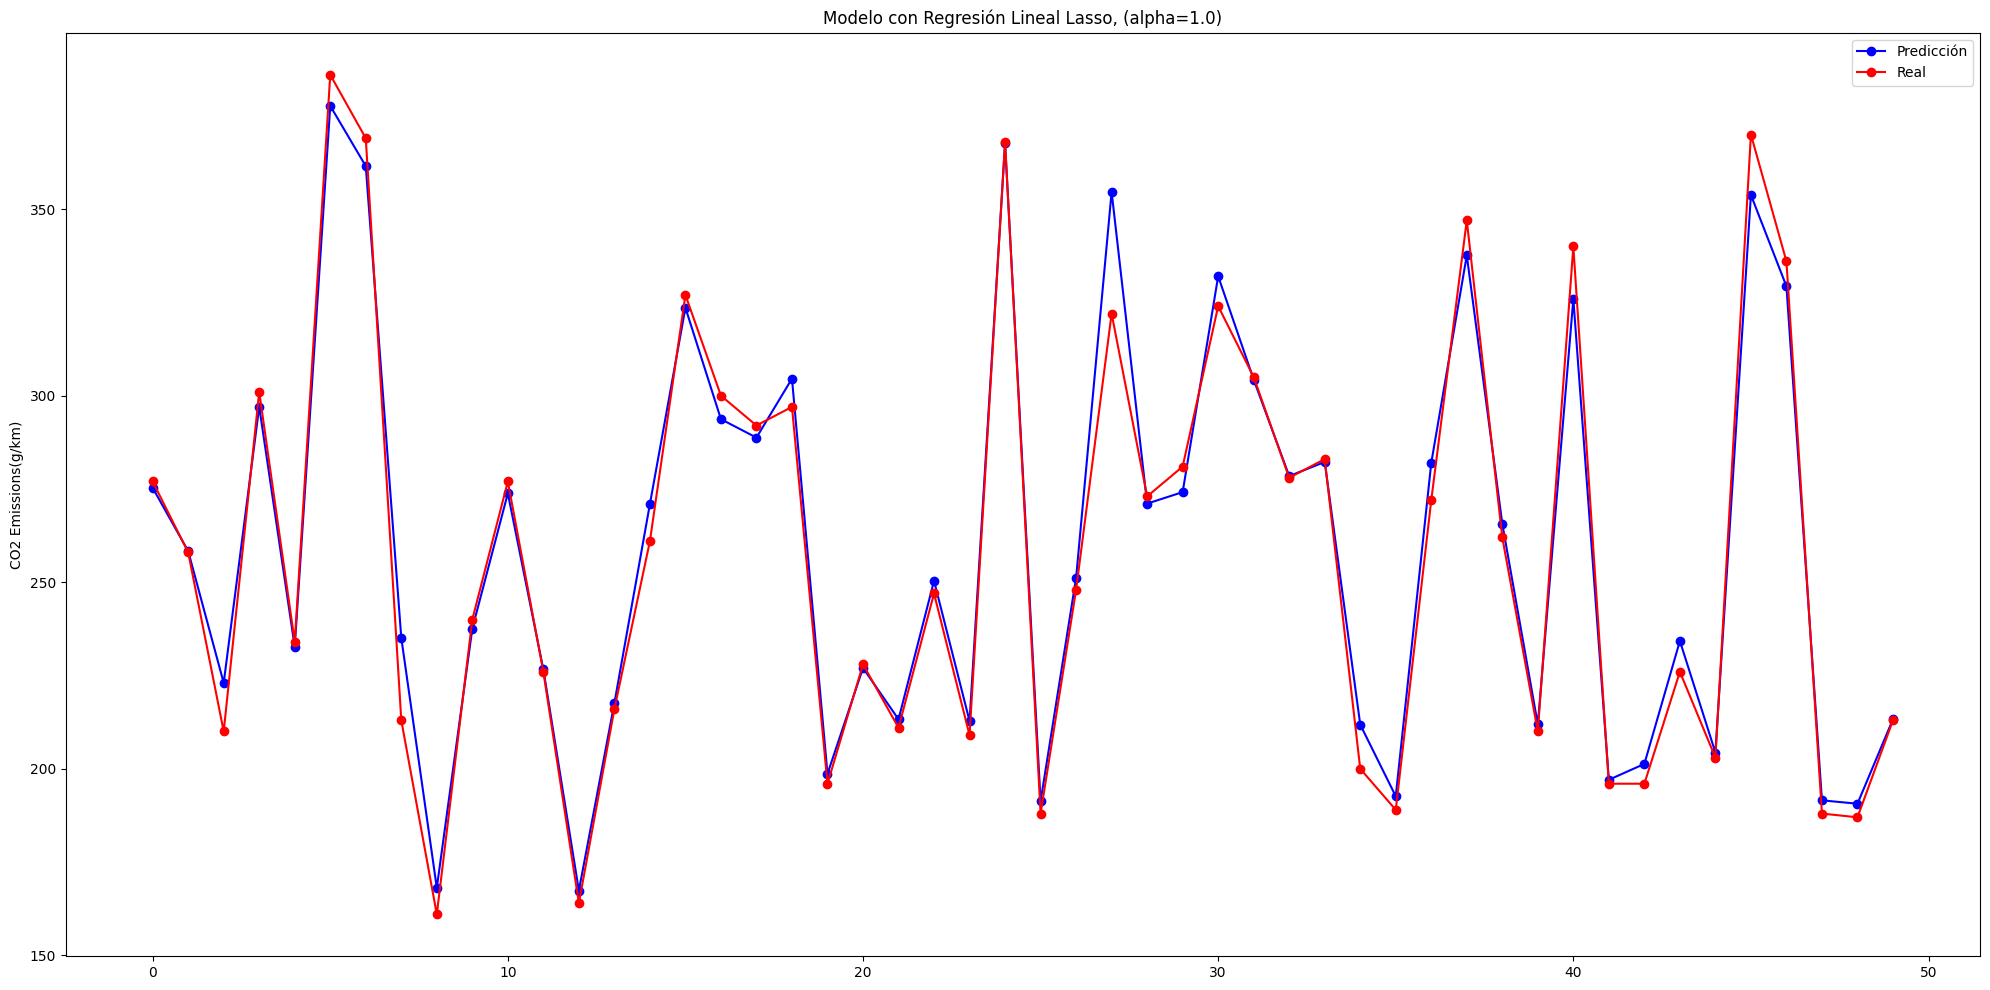

In [40]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(Y_train[:50])))
axs.plot(xvals, y_pred_train_lr_l1[:50],'bo-', label='Predicción')
axs.plot(xvals, Y_train[:50],'ro-', label='Real')

axs.set(title=f'Modelo con Regresión Lineal Lasso, (alpha={pipe_lr_l1["regression"].alpha})', ylabel=Y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

### 3.2.4. Modelo experimental

¿Ahora que pasa cambiamos el hiperparámetro de nuestro modelo?

In [41]:
estimators_lr_l1_m2 = [
        ('transform', preprocessor),
        ('regression', Lasso(alpha=0.001))
]

pipe_lr_l1_m2 = Pipeline(estimators_lr_l1_m2)

pipe_lr_l1_m2.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51777.052943049166, tolerance: 1845.251659934477
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler_std',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ae822a4e650>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fix_cat_values at 0x7ae821e45ab0>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ae821c71330>)])),
                ('regression', Lasso(alpha=0.001))])

Verifiquemos los coeficientes del modelo:

In [42]:
print('Coefficients: ', pipe_lr_l1_m2["regression"].coef_)
print('Intercept: ', pipe_lr_l1_m2["regression"].intercept_)

Coefficients:  [ 9.57157150e-01  1.47837777e+00  4.09881539e+01  2.28944706e+01
 -5.84981177e+00 -7.02102107e+00 -3.01247497e+00 -0.00000000e+00
  1.36739702e+00 -1.19506810e+00  4.96820924e+00 -1.67025767e+00
  1.74950449e+01 -0.00000000e+00 -9.02466002e-01  3.70601851e-01
  3.58921926e+00  1.78659725e+00 -4.87412869e-01  2.36806819e+00
  2.90949194e+00  1.04862074e-01 -0.00000000e+00  1.05985940e+00
 -1.64567493e+00 -4.47684722e-01  1.28174954e+00  9.28593079e-01
  7.38495932e+00 -9.32778580e-01 -2.15701801e+00  1.31446162e+00
  3.49587114e+00 -9.90096498e-01 -7.22829466e-01 -1.84390723e+00
 -1.29467114e+00  2.39277038e-01 -1.77255683e+00  1.84540376e+00
  4.81419933e+00 -2.19866856e+00 -5.72433391e-01  0.00000000e+00
 -1.26391096e+00  6.96842888e-01 -1.19760556e+00 -1.52540044e+00
  3.09355492e+01 -1.07159207e+02 -7.43866868e+01  1.12176943e+00
 -0.00000000e+00]
Intercept:  255.1842259911341


In [43]:
coef_lr_l1_m2 = dict(zip(col_names, pipe_lr_l1_m2["regression"].coef_))
for k,v in coef_lr_l1_m2.items():
    print(f'{k} = {v:,.2f}')

Engine Size(L) = 0.96
Cylinders = 1.48
Fuel Consumption City (L/100 km) = 40.99
Fuel Consumption Hwy (L/100 km) = 22.89
Fuel Consumption Comb (L/100 km) = -5.85
Fuel Consumption Comb (mpg) = -7.02
Make_ACURA = -3.01
Make_ALFA ROMEO = -0.00
Make_ASTON MARTIN = 1.37
Make_AUDI = -1.20
Make_BENTLEY = 4.97
Make_BMW = -1.67
Make_BUGATTI = 17.50
Make_BUICK = -0.00
Make_CADILLAC = -0.90
Make_CHEVROLET = 0.37
Make_CHRYSLER = 3.59
Make_DODGE = 1.79
Make_FIAT = -0.49
Make_FORD = 2.37
Make_GENESIS = 2.91
Make_GMC = 0.10
Make_HONDA = -0.00
Make_HYUNDAI = 1.06
Make_INFINITI = -1.65
Make_JAGUAR = -0.45
Make_JEEP = 1.28
Make_KIA = 0.93
Make_LAMBORGHINI = 7.38
Make_LAND ROVER = -0.93
Make_LEXUS = -2.16
Make_LINCOLN = 1.31
Make_MASERATI = 3.50
Make_MAZDA = -0.99
Make_MERCEDES-BENZ = -0.72
Make_MINI = -1.84
Make_MITSUBISHI = -1.29
Make_NISSAN = 0.24
Make_PORSCHE = -1.77
Make_RAM = 1.85
Make_ROLLS-ROYCE = 4.81
Make_SCION = -2.20
Make_SMART = -0.57
Make_SRT = 0.00
Make_SUBARU = -1.26
Make_TOYOTA = 0.70
Mak

In [44]:
y_pred_train_lr_l1_m2 = pipe_lr_l1_m2.predict(X_train)
y_pred_train_lr_l1_m2

array([275.7014324 , 259.61806237, 213.26449565, ..., 254.17724824,
       313.46144276, 270.32484562])

In [45]:
n,p = X_train.shape

print('------------ Regresión Lasso con entrenamiento------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(Y_train, y_pred_train_lr_l1_m2))
print("R2-score: %.5f" % r2_score(Y_train, y_pred_train_lr_l1_m2) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(Y_train, y_pred_train_lr_l1_m2))*(n-1)/(n-p-1)) )

------------ Regresión Lasso con entrenamiento------------
Residual sum of squares (MSE): 24.55
R2-score: 0.99310
Adj R2-score: 0.99309


Continuamos con la visualización gráfica del modelo:

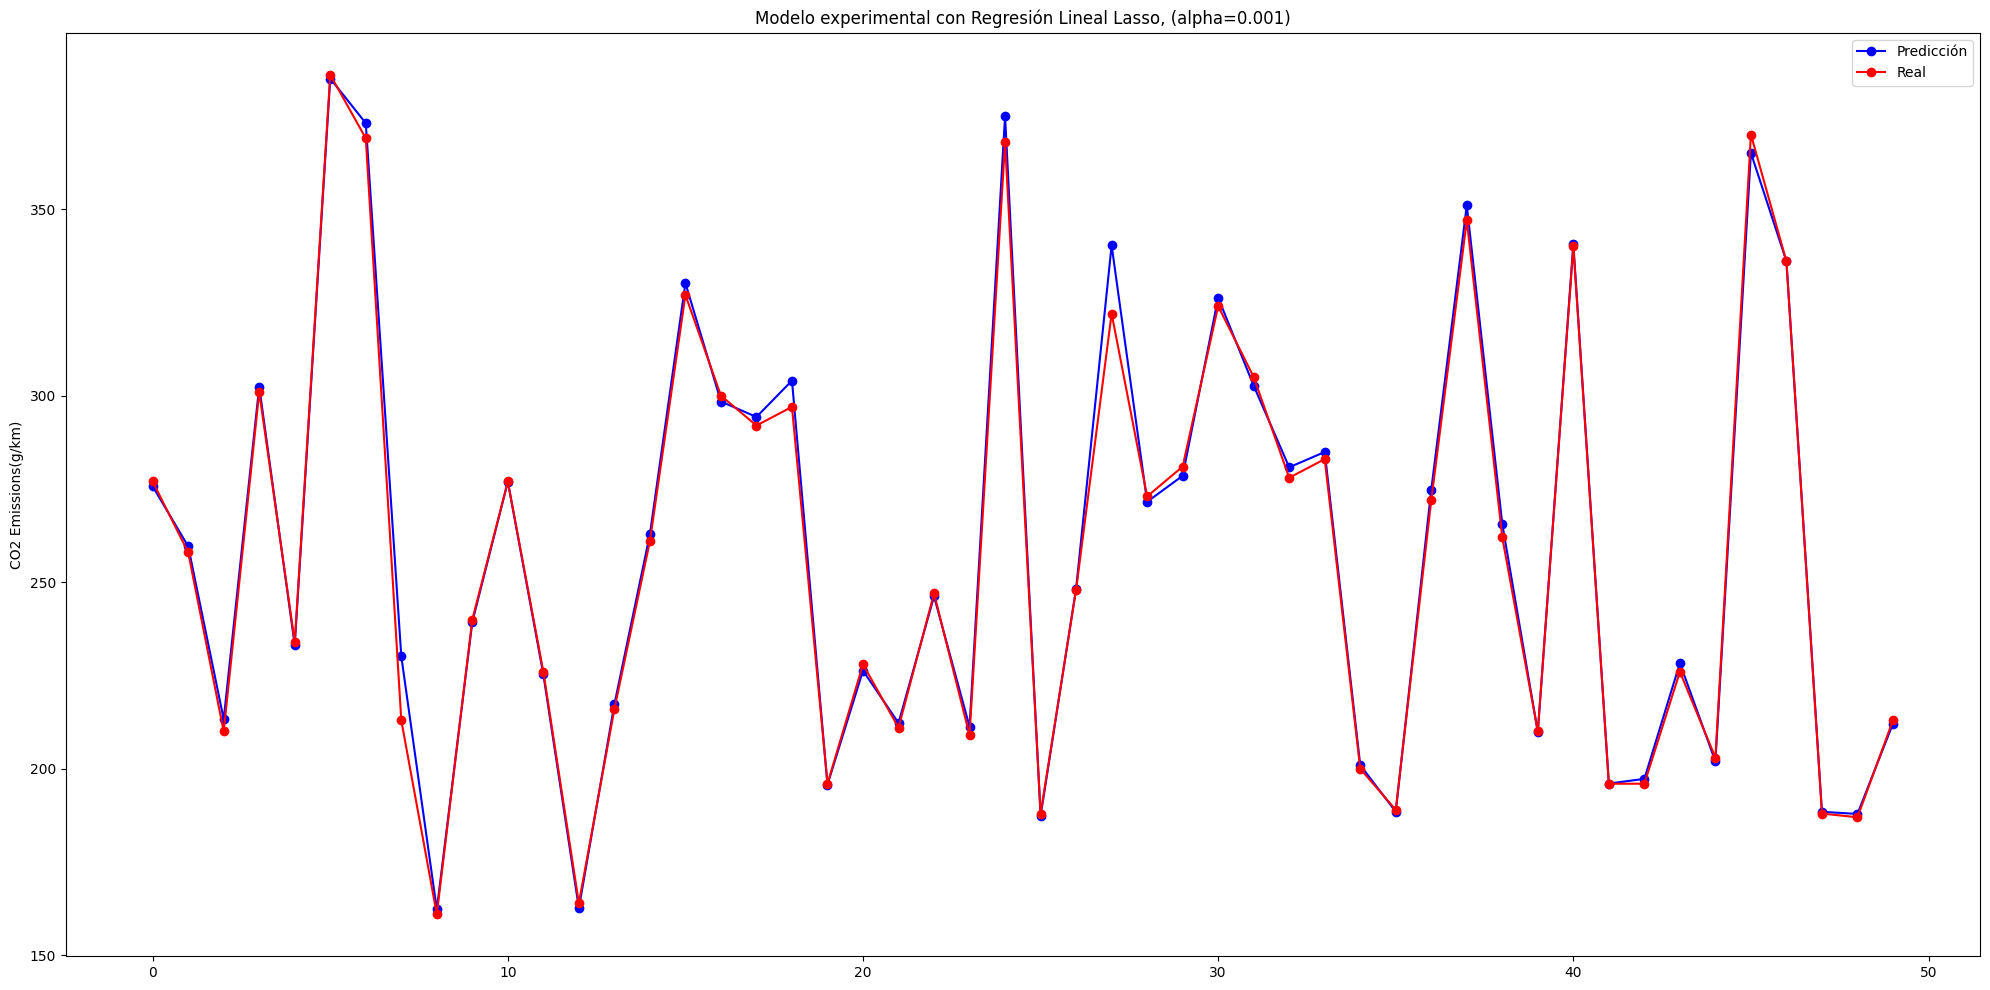

In [46]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(Y_train[:50])))
axs.plot(xvals, y_pred_train_lr_l1_m2[:50],'bo-', label='Predicción')
axs.plot(xvals, Y_train[:50],'ro-', label='Real')

axs.set(title=f'Modelo experimental con Regresión Lineal Lasso, (alpha={pipe_lr_l1_m2["regression"].alpha})', ylabel=Y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

¿Comparamos gráficamente?

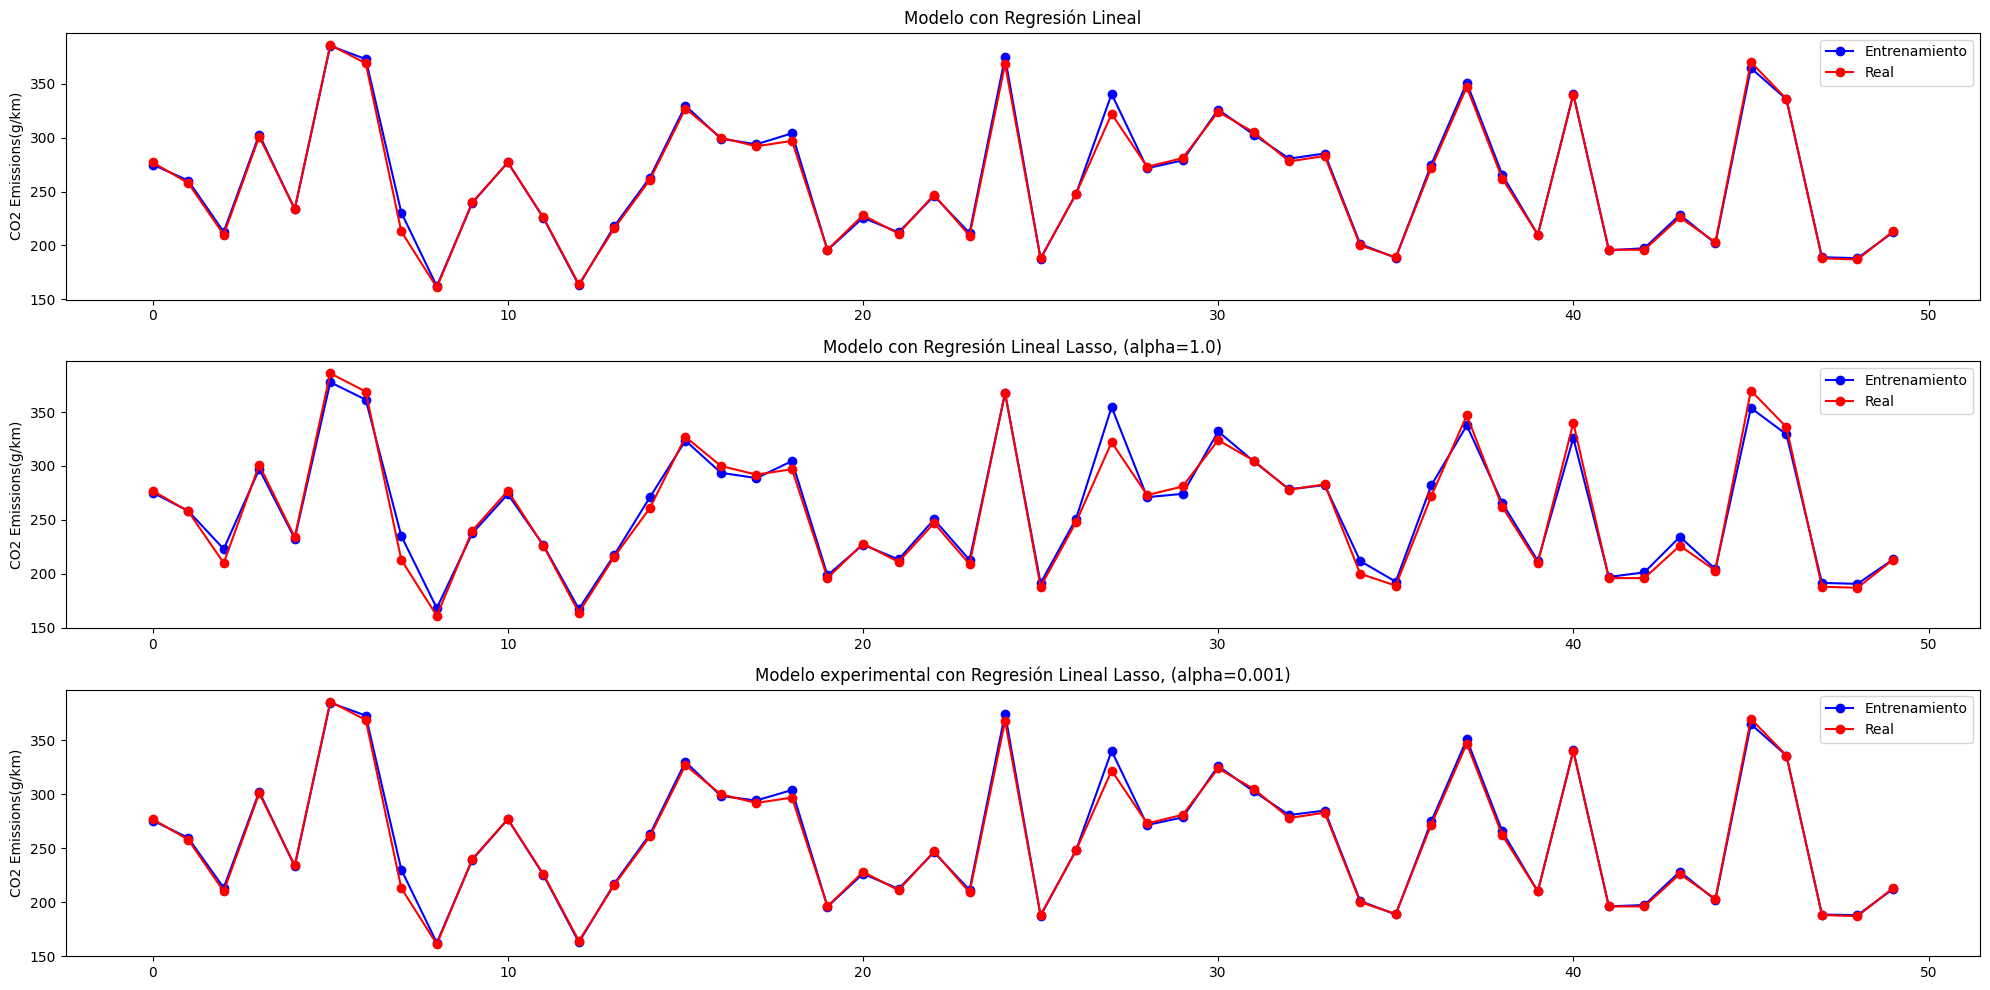

In [47]:
%matplotlib inline
fig, axs = plt.subplots(3,figsize=(20,10))
n= 50

xvals = list(range(len(Y_train[:n])))
axs[0].plot(xvals, y_pred_train_lr[:n],'bo-', label='Entrenamiento')
axs[0].plot(xvals, Y_train[:n],'ro-', label='Real')

axs[1].plot(xvals, y_pred_train_lr_l1[:n],'bo-', label='Entrenamiento')
axs[1].plot(xvals, Y_train[:n],'ro-', label='Real')

axs[2].plot(xvals, y_pred_train_lr_l1_m2[:n],'bo-', label='Entrenamiento')
axs[2].plot(xvals, Y_train[:n],'ro-', label='Real')

axs[0].set(title='Modelo con Regresión Lineal',ylabel=Y_train.name)
axs[0].legend()

axs[1].set(title=f'Modelo con Regresión Lineal Lasso, (alpha={pipe_lr_l1["regression"].alpha})',ylabel=Y_train.name)
axs[1].legend()

axs[2].set(title=f'Modelo experimental con Regresión Lineal Lasso, (alpha={pipe_lr_l1_m2["regression"].alpha})',ylabel=Y_train.name)
axs[2].legend()

plt.tight_layout()
plt.show()

## 3.3. Regresión polinomial con norma L1:

### 3.3.1. Preparación de los datos

In [48]:
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ("scaler_std", StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('imputer', FunctionTransformer(fix_cat_values, validate=False)),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_include=np.number)),
        ("cat", cat_transformer, make_column_selector(dtype_include=object))
    ]
)

### 3.3.2. Implementación

¿Probamos con grado 3?

In [49]:
estimators_pr_l1 = [
        ('transform', preprocessor),
        ('polinomial',PolynomialFeatures(degree=3)),
        ('regression', Lasso())
]

pipe_pr_l1 = Pipeline(estimators_pr_l1)

pipe_pr_l1.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6390.37573846156, tolerance: 1845.251659934477
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler_std',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ae821b62d40>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fix_cat_values at 0x7ae821e45ab0>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ae821b62da0>)])),
                ('polinomial', PolynomialFeatures(degree=3)),
                ('regression', Lasso())])

Visualizamos los coeficientes del modelo:

In [50]:
print('Coefficients: ', pipe_pr_l1["regression"].coef_)
print('Intercept: ', pipe_pr_l1["regression"].intercept_)

Coefficients:  [0.         2.56850707 5.53059008 ... 0.         0.         0.        ]
Intercept:  252.96506527912874


In [51]:
coef_pr_l1 = dict(zip(col_names, pipe_pr_l1["regression"].coef_))
for k,v in coef_pr_l1.items():
    print(f'{k} = {v:,.2f}')

Engine Size(L) = 0.00
Cylinders = 2.57
Fuel Consumption City (L/100 km) = 5.53
Fuel Consumption Hwy (L/100 km) = 0.00
Fuel Consumption Comb (L/100 km) = 11.50
Fuel Consumption Comb (mpg) = 11.04
Make_ACURA = -12.33
Make_ALFA ROMEO = -0.00
Make_ASTON MARTIN = 0.00
Make_AUDI = 0.00
Make_BENTLEY = 0.00
Make_BMW = 0.00
Make_BUGATTI = -0.00
Make_BUICK = -0.00
Make_CADILLAC = -0.00
Make_CHEVROLET = 0.00
Make_CHRYSLER = 0.00
Make_DODGE = -0.00
Make_FIAT = -0.00
Make_FORD = -0.00
Make_GENESIS = -0.00
Make_GMC = 0.00
Make_HONDA = 0.00
Make_HYUNDAI = -0.00
Make_INFINITI = 0.00
Make_JAGUAR = -0.00
Make_JEEP = 0.00
Make_KIA = -0.00
Make_LAMBORGHINI = 0.00
Make_LAND ROVER = -0.00
Make_LEXUS = 0.00
Make_LINCOLN = -0.00
Make_MASERATI = 0.00
Make_MAZDA = 0.00
Make_MERCEDES-BENZ = -0.00
Make_MINI = -0.00
Make_MITSUBISHI = -0.00
Make_NISSAN = -0.00
Make_PORSCHE = -0.00
Make_RAM = -0.00
Make_ROLLS-ROYCE = 0.00
Make_SCION = 0.00
Make_SMART = -0.00
Make_SRT = 0.00
Make_SUBARU = -0.00
Make_TOYOTA = -0.00
Ma

### 3.3.3. Evaluación

In [52]:
y_pred_train_pr_l1 = pipe_pr_l1.predict(X_train)
y_pred_train_pr_l1

array([273.20298842, 255.61608337, 221.42959758, ..., 249.5205579 ,
       312.04718239, 283.60689271])

Demos un vistazo a las métricas obtenidas:

In [53]:
n,p = X_train.shape

print('------------ Regresión Lasso con entrenamiento------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(Y_train, y_pred_train_pr_l1))
print("R2-score: %.5f" % r2_score(Y_train, y_pred_train_pr_l1) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(Y_train, y_pred_train_pr_l1))*(n-1)/(n-p-1)) )

------------ Regresión Lasso con entrenamiento------------
Residual sum of squares (MSE): 90.67
R2-score: 0.97450
Adj R2-score: 0.97446


La visualización gráfica correspondiente:

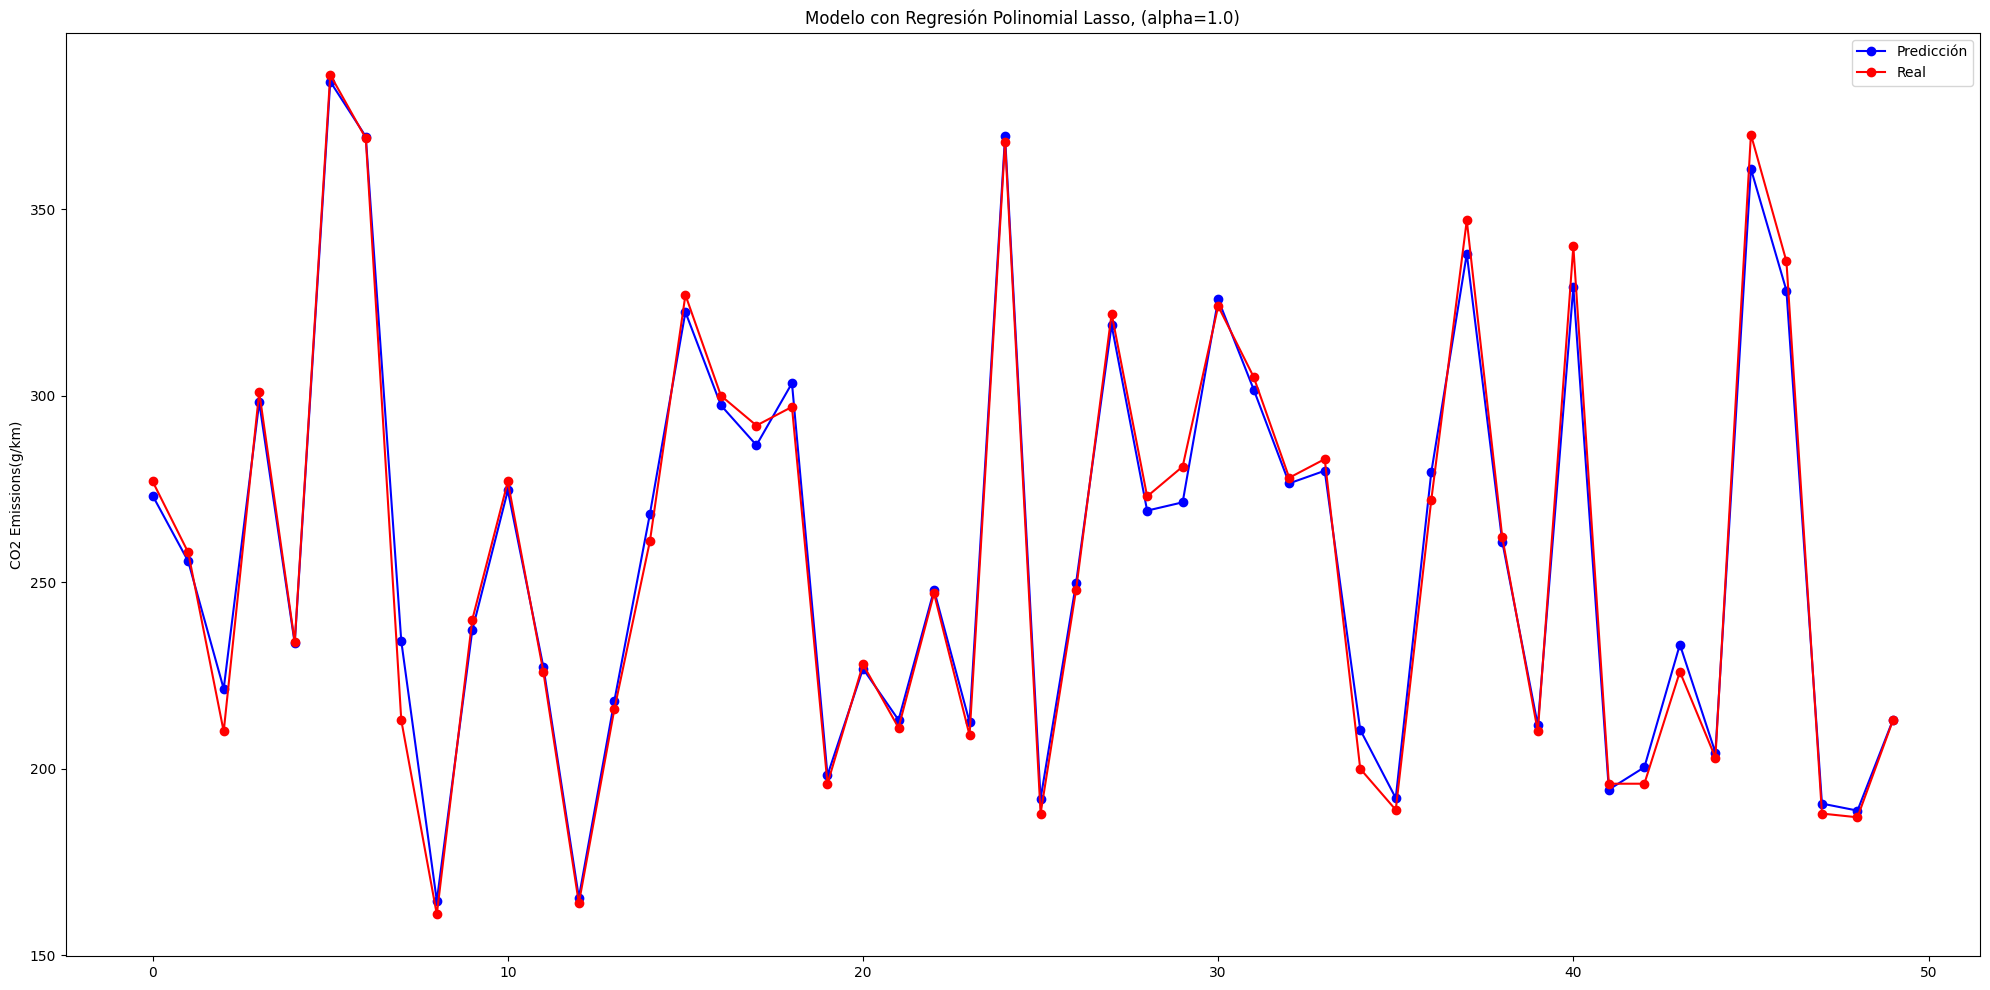

In [54]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(Y_train[:50])))
axs.plot(xvals, y_pred_train_pr_l1[:50],'bo-', label='Predicción')
axs.plot(xvals, Y_train[:50],'ro-', label='Real')

axs.set(title=f'Modelo con Regresión Polinomial Lasso, (alpha={pipe_pr_l1["regression"].alpha})', ylabel=Y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

### 3.3.4. Modelo experimental

In [55]:
estimators_pr_l1_m2 = [
        ('transform', preprocessor),
        ('polinomial',PolynomialFeatures(degree=3)),
        ('regression', Lasso(alpha=0.001))
]

pipe_pr_l1_m2 = Pipeline(estimators_pr_l1_m2)

pipe_pr_l1_m2.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20504.957677210947, tolerance: 1845.251659934477
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler_std',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ae821b62d40>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fix_cat_values at 0x7ae821e45ab0>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ae821b62da0>)])),
                ('polinomial', PolynomialFeatures(degree=3)),
                ('regression', Lasso(alpha=0.001))])

Verifiquemos los coeficientes del modelo:

In [56]:
print('Coefficients: ', pipe_pr_l1_m2["regression"].coef_)
print('Intercept: ', pipe_pr_l1_m2["regression"].intercept_)

Coefficients:  [ 0.         33.16890508  2.32765414 ...  0.          0.
  0.        ]
Intercept:  255.33371699727113


In [57]:
coef_pr_l1_m2 = dict(zip(col_names, pipe_pr_l1_m2["regression"].coef_))
for k,v in coef_pr_l1_m2.items():
    print(f'{k} = {v:,.2f}')

Engine Size(L) = 0.00
Cylinders = 33.17
Fuel Consumption City (L/100 km) = 2.33
Fuel Consumption Hwy (L/100 km) = 19.57
Fuel Consumption Comb (L/100 km) = 8.08
Fuel Consumption Comb (mpg) = 1.72
Make_ACURA = 0.01
Make_ALFA ROMEO = -0.00
Make_ASTON MARTIN = 0.00
Make_AUDI = -0.00
Make_BENTLEY = -0.00
Make_BMW = -0.00
Make_BUGATTI = -0.00
Make_BUICK = 0.00
Make_CADILLAC = 0.00
Make_CHEVROLET = 0.00
Make_CHRYSLER = 0.00
Make_DODGE = 0.00
Make_FIAT = 0.72
Make_FORD = 0.00
Make_GENESIS = 0.00
Make_GMC = 2.66
Make_HONDA = 0.00
Make_HYUNDAI = -0.00
Make_INFINITI = -0.00
Make_JAGUAR = -0.00
Make_JEEP = 0.00
Make_KIA = -0.00
Make_LAMBORGHINI = 0.00
Make_LAND ROVER = -0.00
Make_LEXUS = -0.00
Make_LINCOLN = -0.00
Make_MASERATI = 0.00
Make_MAZDA = 0.00
Make_MERCEDES-BENZ = -0.00
Make_MINI = 0.00
Make_MITSUBISHI = 0.61
Make_NISSAN = -0.30
Make_PORSCHE = -0.00
Make_RAM = -0.00
Make_ROLLS-ROYCE = -0.00
Make_SCION = 0.00
Make_SMART = -0.71
Make_SRT = -0.00
Make_SUBARU = -0.00
Make_TOYOTA = -0.79
Make_

In [58]:
y_pred_train_pr_l1_m2 = pipe_pr_l1_m2.predict(X_train)
y_pred_train_pr_l1_m2

array([275.8691588 , 255.61481285, 211.4404712 , ..., 248.86946078,
       313.41978913, 271.83570577])

In [59]:
n,p = X_train.shape

print('------------ Regresión Lasso con entrenamiento------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(Y_train, y_pred_train_pr_l1_m2))
print("R2-score: %.5f" % r2_score(Y_train, y_pred_train_pr_l1_m2) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(Y_train, y_pred_train_pr_l1_m2))*(n-1)/(n-p-1)) )

------------ Regresión Lasso con entrenamiento------------
Residual sum of squares (MSE): 6.86
R2-score: 0.99807
Adj R2-score: 0.99807


Continuamos con la visualización gráfica del modelo:

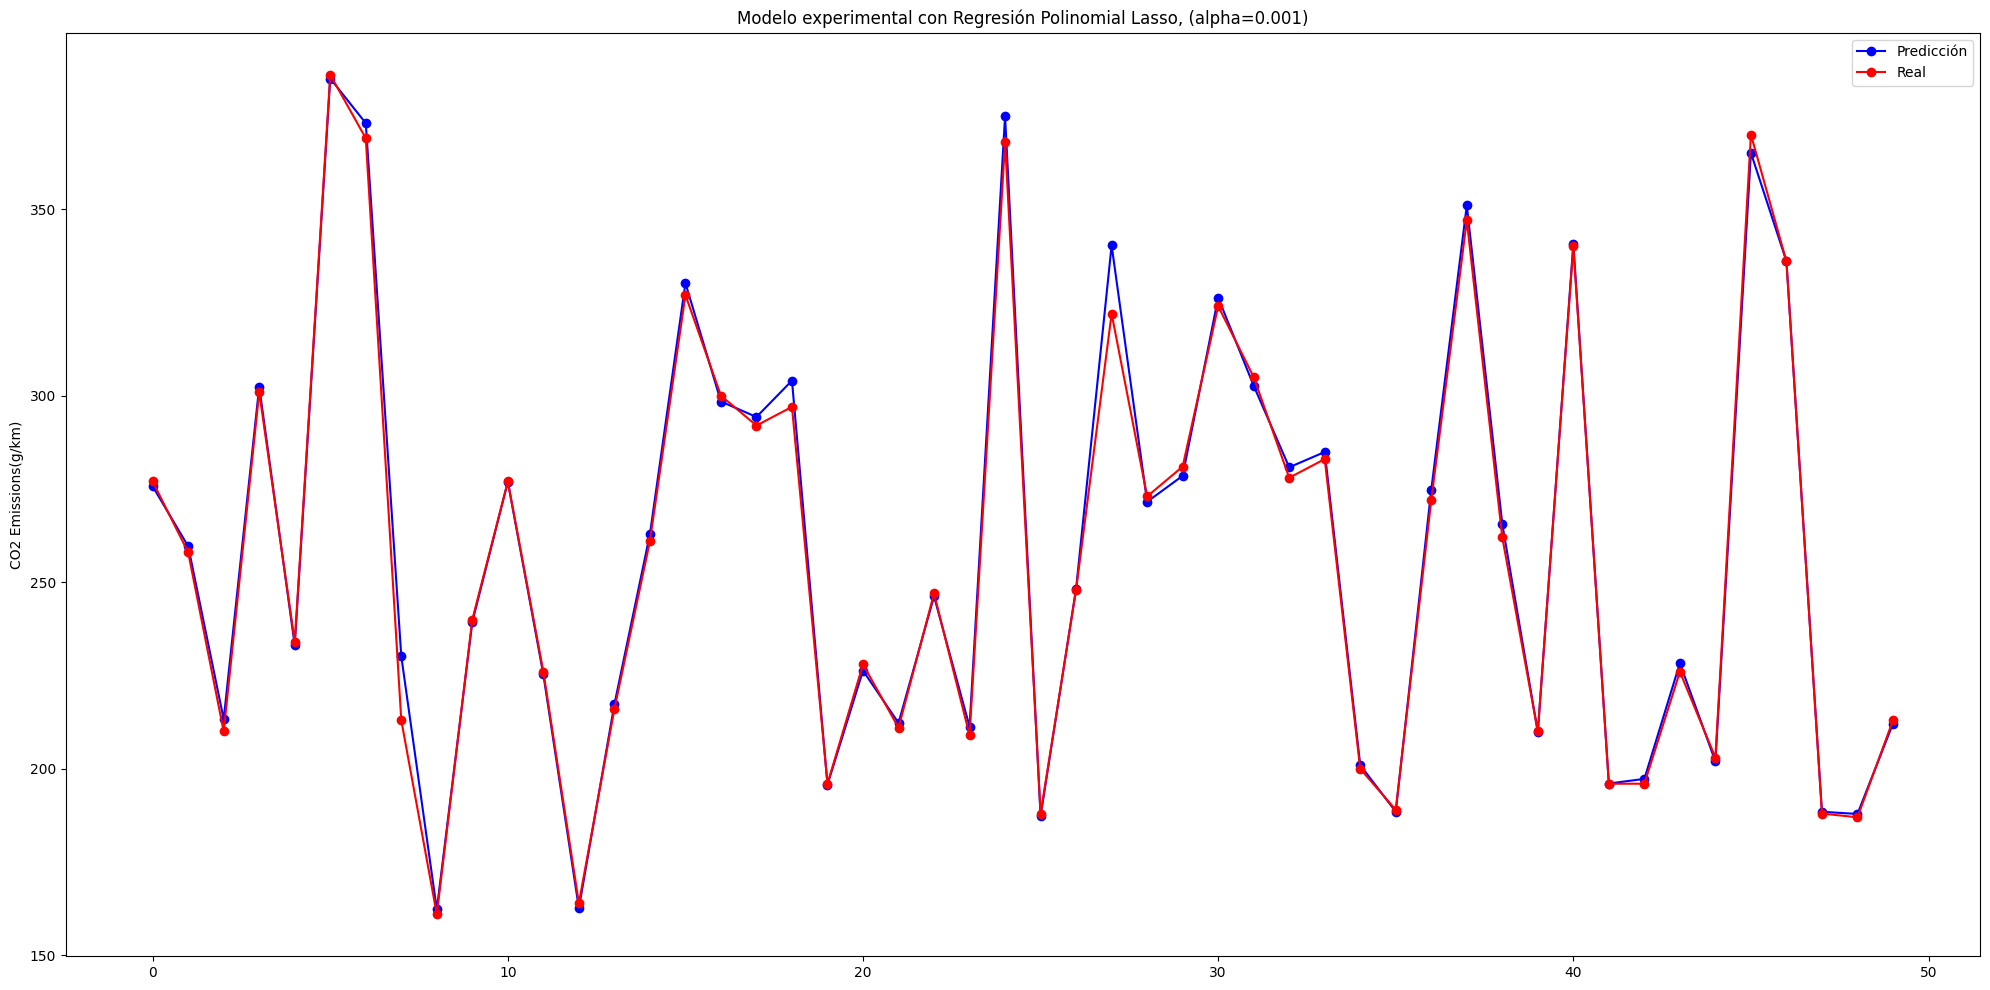

In [60]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(Y_train[:50])))
axs.plot(xvals, y_pred_train_lr_l1_m2[:50],'bo-', label='Predicción')
axs.plot(xvals, Y_train[:50],'ro-', label='Real')

axs.set(title=f'Modelo experimental con Regresión Polinomial Lasso, (alpha={pipe_pr_l1_m2["regression"].alpha})', ylabel=Y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

# 4. Mejor modelo polinomial con L1.

## 4.1. Definición para la búsqueda de hiperparámetros.

Ahora si, ¿Que pasa si pongo todo junto? ¿Que pasa si defino un espacio de búsqueda para mis hiperparámetros? ¿Y si utilizo **validación cruzada** para encontrar los hiperparámetros de mi modelo?

In [61]:
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean'))
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('imputer', FunctionTransformer(fix_cat_values, validate=False)),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_include=np.number)),
        ("cat", cat_transformer, make_column_selector(dtype_include=object))
    ]
)

estimators_pr_l1_hip = [
        ('transform', preprocessor),
        ('polinomial',PolynomialFeatures()),
        ('regression', Lasso())
]

pipe_pr_l1_hip = Pipeline(estimators_pr_l1_hip)

parameters = {
              'polinomial__degree':[2,3],
              'regression__alpha': [0.0001, 0.001, 0.01, 1, 10, 30],
              'transform__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'transform__cat': [OneHotEncoder(handle_unknown='ignore'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0)]
              }

grid_search = GridSearchCV(pipe_pr_l1_hip, parameters, verbose=2, scoring='neg_mean_squared_error', cv=5)

## 4.2. Búsqueda de hiperparámetros.

In [ ]:
%%time
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15163.667105364924, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15842.523378785987, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15327.137644871716, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16088.097969283272, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14195.699667945195, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14807.467185767144, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15113.791047554734, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   7.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14888.24651874223, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15766.974097335444, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13890.992060176328, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15971.634556907065, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16614.501038805225, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16139.259359039166, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16824.346810502764, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14727.91282535053, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   7.1s
[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.0001, transform__c

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15151.579423001776, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15662.643053841415, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15353.74247530055, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15870.719121361893, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14200.201564777582, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9699.600093188283, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9150.18539807053, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10307.77565336692, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10231.125850054683, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9946.90566164575, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17128.773702156508, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17774.248225890613, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17264.316211325488, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18004.15473427844, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15803.535546564259, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   6.3s
[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.001, transform__cat=Ord

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11325.942742781379, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8755.135833779446, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11234.700510777513, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14541.07350241873, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12197.939554418615, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   4.5s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1518.8391445925226, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   3.8s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   4.1s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   3.9s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20177.15245453979, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20278.881770087668, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19839.042334362246, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20208.59822575707, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17900.787019876716, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   4.7s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=0.01, transform__cat=OrdinalEn

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2556.5180825906573, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   3.8s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   3.7s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1893.7414706157288, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   3.5s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   4.5s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.3s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.4s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.4s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.4s
[CV] END polinomial__degree=2, regression__alpha=1, tr

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8492.713260474098, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   3.9s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7455.819398125546, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   4.1s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3422.9527597667984, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   3.9s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unkno

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4287.98297048689, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   4.0s
[CV] END polinomial__degree=2, regression__alpha=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2116.546596709435, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2633.8668621098914, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2704.9267897574755, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   4.0s
[CV] END polinomial__degree=2, regression__alpha=10, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=10, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=10, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=10, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=10, transform__cat=OrdinalEncoder(handle

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3047.0140390205197, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=30, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2678.4171993618365, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=30, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2547.6949376140255, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=30, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2851.258550039027, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=2, regression__alpha=30, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   3.8s
[CV] END polinomial__degree=2, regression__alpha=30, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   3.6s
[CV] END polinomial__degree=2, regression__alpha=30, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=30, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=30, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, regression__alpha=30, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unkn

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13004.149387877096, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  30.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13427.683278291606, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  34.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13077.448097069917, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  35.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13888.227495262136, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  35.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13208.442519010843, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  30.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13053.584722909723, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  25.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14071.312499374708, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  24.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13393.032898487341, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  24.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13776.042679615704, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  24.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12734.967138297146, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  25.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13056.11021871119, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  33.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13914.541590093746, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  33.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13415.734498216416, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  33.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14205.230123325438, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  32.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12992.996680173474, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  33.5s
[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.0001, transform__c

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15248.695584331273, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  24.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16470.55368304769, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  24.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15624.246620682854, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  24.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16675.390091394922, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  24.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15036.431066775835, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  24.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8901.0865485452, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  21.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9143.419660238715, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  21.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8771.632470416815, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  20.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10989.075964731668, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  19.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8609.68490015095, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  20.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13847.991662932092, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  29.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15121.351201078849, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  29.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14596.113394353559, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  29.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15389.786268997095, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  29.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13654.016232751506, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  29.2s
[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.001, transform__cat=Ord

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20114.599578671303, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  20.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23205.670137229736, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  20.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19016.590342927986, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  20.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20596.732342328243, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  19.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20705.04529158597, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  20.0s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  19.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1738.0507864960964, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  18.4s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  18.9s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  18.2s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=  18.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16453.70463599459, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  25.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17281.31647297832, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  24.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16783.20214528197, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  24.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17574.83378299421, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  24.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15651.01843214346, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  25.0s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=0.01, transform__cat=OrdinalEn

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5678.9314974364825, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  18.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3654.4428529791767, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  18.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10363.993850542407, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  18.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4873.540670640476, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  17.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5058.26740899618, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=  18.5s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   1.7s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   1.7s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   1.8s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   1.9s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25947.35511995236, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  19.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26167.915691760878, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  19.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25579.96232324305, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  19.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24032.88724512035, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  19.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23847.512443072614, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  19.7s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=1, transform__cat=OrdinalEncoder(handle_unkno

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41334.40981309401, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  18.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39510.63224681597, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  18.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40561.17780772288, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  18.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38897.745578111244, tolerance: 1484.0027299927733
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  18.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40081.05817976128, tolerance: 1476.2825442919075
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  18.9s
[CV] END polinomial__degree=3, regression__alpha=10, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=10, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=10, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=10, transform__cat=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0), transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=3, regression__alpha=10, transform__cat=OrdinalEncoder(handle

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37167.43528246804, tolerance: 1487.4889751867022
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=30, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  18.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24985.029177669792, tolerance: 1435.5539847747534
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=30, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  18.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48061.533944478666, tolerance: 1497.0880344013497
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END polinomial__degree=3, regression__alpha=30, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=  18.7s


In [ ]:
best_model = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

In [ ]:
grid_search.best_params_

## 4.3. Evaluación

In [ ]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
y_pred_train

In [ ]:
n,p = X_train.shape

print('------------ Regresión Lasso con entrenamiento------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(Y_train, y_pred_train))
print("R2-score: %.5f" % r2_score(Y_train, y_pred_train) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(Y_train, y_pred_train))*(n-1)/(n-p-1)) )

n,p = X_test.shape

print('------------ Regresión Lasso con evaluación ------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(Y_test, y_pred_test))
print("R2-score: %.5f" % r2_score(Y_test, y_pred_test) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(Y_test, y_pred_test))*(n-1)/(n-p-1)) )

Visualización gráfica de entrenamiento y test:

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(2,figsize=(20,10))
a = 1000
b= 1080

xvals = list(range(b-a))
axs[0].plot(xvals, y_pred_train[a:b],'bo-', label='Predicción')
axs[0].plot(xvals, Y_train[a:b],'ro-', label='Real')

axs[1].plot(xvals, y_pred_test[a:b],'bo-', label='Predicción')
axs[1].plot(xvals, Y_test[a:b],'ro-', label='Real')

axs[0].set(title='Predicción con Regresión Lasso con CV - Entrenamiento', ylabel=Y_train.name)
axs[0].legend()

axs[1].set(title='Predicción con Regresión Lasso con CV - Evaluación', ylabel=Y_train.name)
axs[1].legend()

plt.tight_layout()
plt.show()

Ya con nuestro mejor modelo encontrado y teniendo un rendimiento esperado en producción, podremos determinar la importancia de las variables del modelo gracias a la Regresión Lasso. Para ello se obtuvo el siguiente resultado.

In [ ]:
lasso_model = best_model['regression']
trans_df = best_model['transform'].transform(X_test)
fake_df = best_model['polinomial'].transform(trans_df)

cat_names = best_model['transform'].transformers_[1][1].get_feature_names_out()
num_names = best_model['transform'].transformers_[0][2]#.feature_names_in_
col_names = list(num_names) + list(cat_names)

print(f'Intercepto: {lasso_model.intercept_}')
coef = list(zip(['Intercepto'] + list(col_names), [lasso_model.intercept_] + list(lasso_model.coef_)))
coef = pd.DataFrame(coef,columns=['Variable','Parámetro'])
coef

In [ ]:
coef.sort_values('Parámetro')

In [ ]:
coef[coef['Parámetro'].between(-1,1)]

Si queremos salvar el modelo para uso en producción:

In [ ]:
dump(best_model,'lasso_regressor.pkl')

Si lo queremos cargar, sería de la siguiente forma:

In [ ]:
model = load('lasso_regressor.pkl')
model

# 5. Preguntas

- ¿Qué diferencia en rendimiento tendría la regresión lineal con Pipeline si estandarizas los datos?.
- ¿Qué interpretación darías a los coeficientes en penalización L1 y L2?.
- ¿Qué variables eliminarias y/o adicionarías para la implementación de un nuevo modelo?.
- ¿Qué otro espacio de búsqueda o hiperparámetros serían buenos de buscar en este modelo?.